<a href="https://colab.research.google.com/github/Ananda0047/Bangla-Sentiment-Analysis/blob/main/Bangla_Sent_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
       # print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Import pandas
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving Bangla_Sent.xlsx to Bangla_Sent.xlsx


In [3]:
import io
train = pd.read_excel(io.BytesIO(uploaded['Bangla_Sent.xlsx']))
# Dataset is now stored in a Pandas Dataframe

In [4]:
import numpy as np
import pandas as pd
from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import re

from nltk import word_tokenize


In [5]:
train.head()

,Text,Sentiment
0,অই জায়গার ডাক্তাররা কি গু খায় কে পাগল কে সুস্থ...,disgust
1,অনেকদিন হলো তাকে দেখিনা মাঝে মাঝে কান্না আসে,sadness
2,অগণতান্ত্রিক একটি জঘন্য দেশে আমার বাস,disgust
3,অটো রিস্কা বন্ধ করতে হবে তা না হলে আরো সংকট বে...,fear
4,অটোরিকশা বন্ধ না করলে আরও সংকট হবে মনে হচ্ছে,fear


In [6]:
train = train.dropna()

In [7]:
X_train,X_test,y_train,y_test=train_test_split(train["Text"],train["Sentiment"],test_size=0.2,shuffle=True,stratify=train["Sentiment"],random_state=42)

In [8]:
train_index=X_train.index
test_index=X_test.index

In [9]:
# train_index=train.iloc[X_test.index]["Text"].values

In [10]:
# X_test

In [11]:
# train = train.dropna()

# train = train.reset_index(drop=True)
# test = test.reset_index(drop=True)

# X_train = train['cleanText']
# y_train = train['category']

# X_test = test['cleanText']
# y_test = test['category']

# X_test.head()

In [12]:
def example_fn(index):
    example = train[train.index == index][['Sentiment', 'Text']].values[0]
    if len(example) > 0:
        print(example[1])
        print()
        print('Sentiment:', example[0])


In [13]:
example_fn(10)

অথচ দিনশেষে যারা আমাদের আইডল হওয়ার কথা সেই ডাক্তাররা সেবা দিয়ে মাগনা গালি খায় 

Sentiment: disgust


In [14]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each text.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 7763 unique tokens.


In [15]:
X_train = tokenizer.texts_to_sequences(train.iloc[train_index]["Text"].values)
X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of train data tensor:', X_train.shape)

Shape of train data tensor: (3855, 250)


In [16]:
y_train = pd.get_dummies(train.iloc[train_index]["Sentiment"]).values
print('Shape of train label tensor:', y_train.shape)

Shape of train label tensor: (3855, 6)


In [17]:
# pd.get_dummies(train.iloc[train_index]["Sentiment"])


In [18]:
# y_train

In [19]:
X_test = tokenizer.texts_to_sequences(train.iloc[test_index]["Text"].values)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of test data tensor:', X_test.shape)

Shape of test data tensor: (964, 250)


In [20]:
y_test = pd.get_dummies(train.iloc[test_index]["Sentiment"]).values
print('Shape of test label tensor:', y_test.shape)

Shape of test label tensor: (964, 6)


In [21]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(3855, 250) (3855, 6)
(964, 250) (964, 6)


In [22]:
X_train.shape[1]

250

In [23]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [24]:
model = tf.keras.Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 6)                 606       
                                                                 
Total params: 5,081,006
Trainable params: 5,081,006
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
epochs = 30
batch_size = 100

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_accuracy', patience=10, min_delta=0.0001,mode="max")])


Epoch 1/30
35/35 [==============================] - 54s 1s/step - loss: 1.7525 - accuracy: 0.3220 - val_loss: 1.6683 - val_accuracy: 0.5285
Epoch 2/30
35/35 [==============================] - 42s 1s/step - loss: 1.3475 - accuracy: 0.5987 - val_loss: 1.0967 - val_accuracy: 0.6788
Epoch 3/30
35/35 [==============================] - 44s 1s/step - loss: 0.6583 - accuracy: 0.8282 - val_loss: 0.6669 - val_accuracy: 0.7746
Epoch 4/30
35/35 [==============================] - 46s 1s/step - loss: 0.2598 - accuracy: 0.9369 - val_loss: 0.6195 - val_accuracy: 0.7902
Epoch 5/30
35/35 [==============================] - 41s 1s/step - loss: 0.1213 - accuracy: 0.9732 - val_loss: 0.5713 - val_accuracy: 0.8238
Epoch 6/30
35/35 [==============================] - 41s 1s/step - loss: 0.0691 - accuracy: 0.9873 - val_loss: 0.5663 - val_accuracy: 0.8187
Epoch 7/30
35/35 [==============================] - 42s 1s/step - loss: 0.0391 - accuracy: 0.9928 - val_loss: 0.6092 - val_accuracy: 0.8083
Epoch 8/30
35/35 [==

In [26]:

accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

31/31 [==============================] - 4s 143ms/step - loss: 0.6608 - accuracy: 0.8361
Test set
  Loss: 0.661
  Accuracy: 0.836


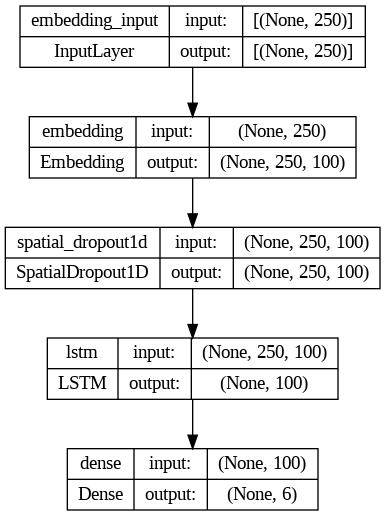

In [27]:
 tf.keras.utils.plot_model(model, show_shapes=True)

In [28]:
from sklearn.metrics import classification_report
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
dummy_y_train = np_utils.to_categorical(encoded_y_train) # convert integer

encoded_y_test = encoder.transform(y_test)
dummy_y_test = np_utils.to_categorical(encoded_y_test) # convert integer

target_names = encoder.classes_
print(classification_report(encoded_y_test, y_pred, target_names=target_names))

ValueError: ignored

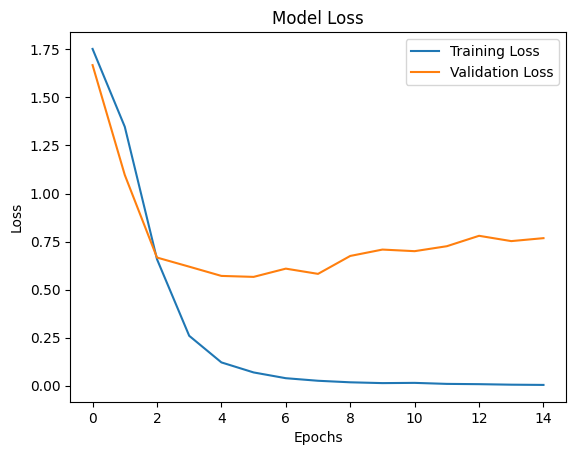

In [29]:
import matplotlib.pyplot as plt
plt.title('Model Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel("Loss")

plt.show();

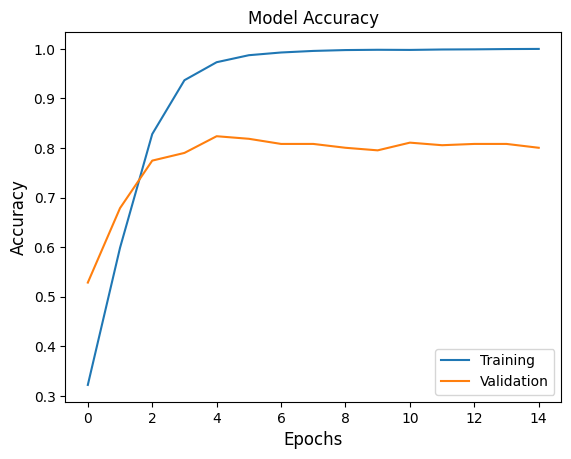

In [30]:
plt.title('Model Accuracy')
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.show();


In [31]:
def check_sentiment(text):
    new_text = [text]
    seq = tokenizer.texts_to_sequences(new_text)
    padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    pred = model.predict(padded)
    labels = ["anger","disgust","fear","joy","sadness","surprise"]
    return labels[np.argmax(pred)]


In [32]:
check_sentiment('চার ঘণ্টা ধরে কারেন্ট নাই। ছেলেটা গরমে ছোটফট করছে')

1/1 [==============================] - 0s 361ms/step


'sadness'

In [33]:
check_sentiment('পাশে আছি ভাই। আপনার এক ডাকে হাজার লোক দাড়ায় যাবেে')

1/1 [==============================] - 0s 78ms/step


'joy'

In [34]:
check_sentiment('এই হলো আমাদের ডিজিটাল বাংলাদেশ এর দশা')

1/1 [==============================] - 0s 60ms/step


'surprise'

In [35]:
check_sentiment('সরকারি এমপি মন্ত্রীদের লাইন কাইটা দেওয়া হোক')

1/1 [==============================] - 0s 54ms/step


'anger'

In [36]:
check_sentiment('সব তেল দিয়ে দে ইন্ডিয়া রে')

1/1 [==============================] - 0s 57ms/step


'anger'

In [37]:
check_sentiment('আমার ভয় করছে না জানে কি হয়')

1/1 [==============================] - 0s 64ms/step


'fear'

In [38]:
check_sentiment('')

1/1 [==============================] - 0s 55ms/step


'fear'

In [39]:
check_sentiment('নতুন বিদ্যুৎকেন্দ্র স্থাপন করা হয়েছে')

1/1 [==============================] - 0s 72ms/step


'joy'

In [40]:
model.save("LSTM.h5")